In [105]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
# %matplotlib inline automatically renders plotting
%matplotlib inline

# Setting dpi of plotted figures to 400, high resolution images
mpl.rcParams['figure.dpi'] = 400


In [106]:
# '..' signifies up one level, to parent directory.
df = pd.read_excel('../Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

### Business Problem

 - Credit card company with data on 30,000 of their account holders with financial data over the past 6 months.

 - Data is presented on the credit card level, with each row representing a single credit card account.

 - Financial data for each credit card account represents a 6 month historical period encoded each month for the status of an account's payments. Finally, there is also a column indicating whether or not the account has defaulted immediately after the 6 month period.

### Basic Data Exploration

In [107]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [108]:
# PAY_1 is datatype object, whereas all other PAY_# are int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [109]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.833333,1.535900,35.108800,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.807699,0.542698,9.851592,1.191215,1.191096,1.162348,1.127519,1.144981,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [110]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [111]:
df.shape
# 30,000 rows

(30000, 25)

### Data Quality Checks & Exploration - ID, PAY_1

In [112]:
# From client, each row should contain a unique account
df['ID'].nunique() 

29687

In [113]:
# From nunique: 29,687 unique accounts, but 30,000 rows of data
df['ID'].value_counts().value_counts()
# From above, 313 accounts have a count of 2. 29,374 accounts appear once in the dataset. 

1    29374
2      313
Name: ID, dtype: int64

In [114]:
# Exploring accounts that appear more than once. Isolate accounts that appear twice. Why do they appear?
# Create mask for value counts != 1 (hence duplicates)
# Apply mask to index of value_counts (array of IDs) using duplicate mask
# Length of duplicate ids matches exploration above: 313 duplicate ids
duplicates_mask = df['ID'].value_counts() != 1
duplicate_ids = df['ID'].value_counts().index[duplicates_mask]

In [115]:
# Examining duplicate ids in dataframe
df[df['ID'].isin(duplicate_ids)]
# There are rows of data where all columns contain 0 as data
# Duplicates are from accounts with all 0 in dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29875,97d1d2eb-c72f,280000,1,1,1,31,0,0,0,0,...,149816,128721,130406,8900,8100,7200,5000,5000,4700,0


In [116]:
# Isolating rows where all columns of data are 0, then proceed to filter them out of the dataframe 

# Create True False mask first
all_zeros = df == 0
# Find where in mask a row has all True values (all columns = True)
all_zeros.iloc[:, 1:].all(axis=1)
# df.iloc[:, 1:].all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [117]:
# To get the inverse of above, apply tilda operator ~
df_clean_1 = df[~all_zeros.iloc[:, 1:].all(axis=1)].copy()
df_clean_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [118]:
# Double checking that duplicates are no longer present
df_clean_1['ID'].value_counts().value_counts()

1    29685
Name: ID, dtype: int64

In [119]:
# From df.info above, PAY_1 contained object data types, whereas all other PAY_# contained int64 data
df_clean_1['PAY_1'].value_counts()

# From data dictionary: 'Not Available', '0', '-2' are not present.
# 'Not available': 3,021
# '0': 13,087
# '-2': 2,476
# Removing rows of data in which 'Not Available' is present
sum(df_clean_1['PAY_1'] != 'Not available')

# Sum above indicates 26,664 accounts do not contain 'Not Available' value in PAY_1. Use this value to verify filter
# Filter out all rows containing Not available as data
df_clean_2 = df_clean_1.loc[df['PAY_1'] != 'Not available', :].copy()

In [120]:
df_clean_2['PAY_1'].value_counts()
# From value counts check, there are no longer any 'Not available' values in dataset

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [121]:
# With the 'Not available' string no longer present in the dataset, convert PAY_1 column data type to integers
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


### Data Quality Checks & Exploration - LIMIT_BAL, AGE

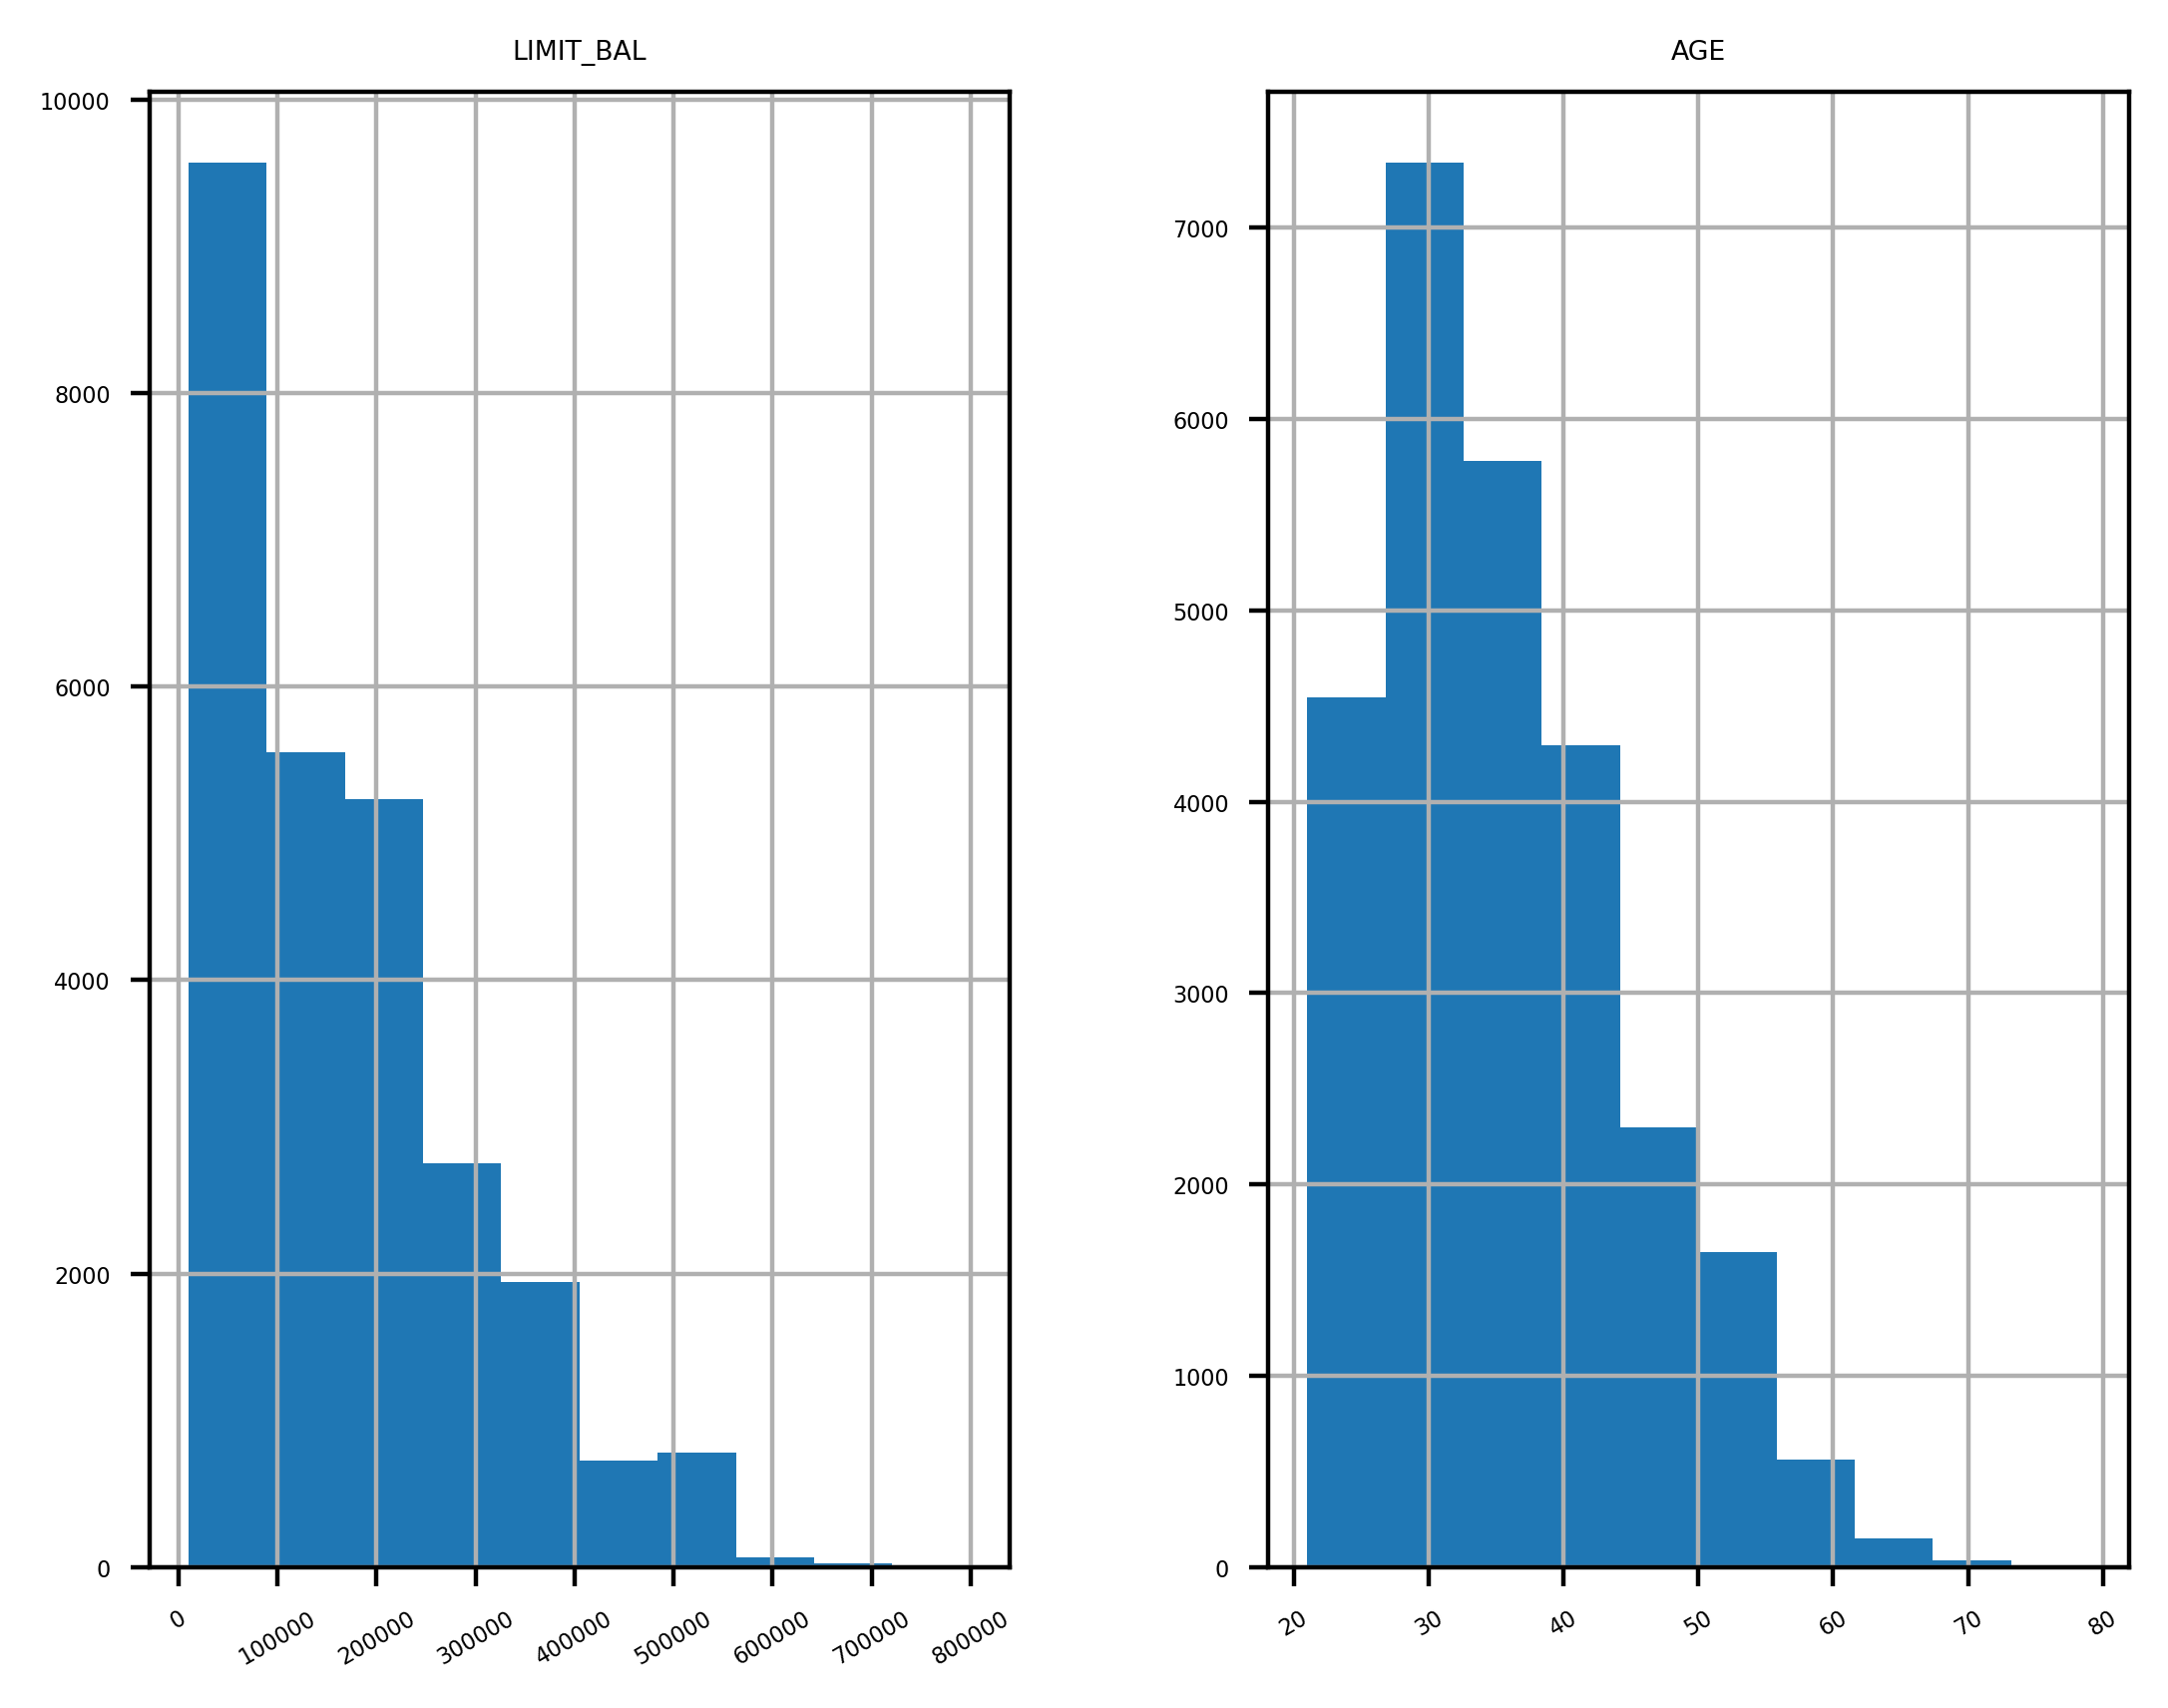

In [122]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist(xrot=30)
mpl.rcParams['font.size'] = 1.5
# The distributions of these fields are reasonable. 
# The dataset is from Taiwan, this the limit balance ~10,000 currency as the mode and lower end of the spectrum is to be expected.
# It is also reasonable to expect the age of credit card owners to be at a minimum ~21, with younger individuals having more credit card accounts.

In [123]:
# To further describe the data
df_clean_2[['LIMIT_BAL', 'AGE']].describe()
# Note the minimum age is 21

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


### Data Quality Checks & Exploration - EDUCATION, MARRIAGE

In [124]:
df_clean_2['EDUCATION'].value_counts().sort_index()
# Looking at count of distinct education values, there are unknown education coded values here
# Values 0, 5, and 6 do not appear in our data dictionary

0       11
1     9412
2    12458
3     4380
4      115
5      245
6       43
Name: EDUCATION, dtype: int64

In [125]:
df_clean_2['MARRIAGE'].value_counts().sort_index()
# Marriage encounters the same problem as education. The '0' value in marriage is not present in our data dictionary. 

0       48
1    12172
2    14158
3      286
Name: MARRIAGE, dtype: int64

In [126]:
# In both cases, there is a coded value for 'Other' as defined in our data dictionary. For both education and marriage, we will replace these undefined values with the coded value for 'Other'.
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)

In [127]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [128]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Introducing a Categorical Feature: How to decide on an appropriate encoding method?

In [129]:
# After cleaning our data, df_clean_2.info() shows that our columns of data are not of type int64 for all columns except ID.
# To practice encoding best practices, introduce a new column called EDUCATION_CAT, which serves as a string representation of the EDUCATION column
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(
    {
        1: 'graduate school',
        2: 'university',
        3: 'high school',
        4: 'others'
    }
)

In [130]:
# From the newly introduced categorical feature (EDUCATION_CAT), there is a clear hierarchal ranking of education. Introducing ordinal encoding may be fitting here, but with an inherent hierarchal ranking, a machine learning model may seek to find a linear relation that does not exist. To ensure this is not the case, first look into if the feature has a linear relationship with the response variable 'default payment next month'.

Text(0.5, 0, 'Education level: ordinal encoding')

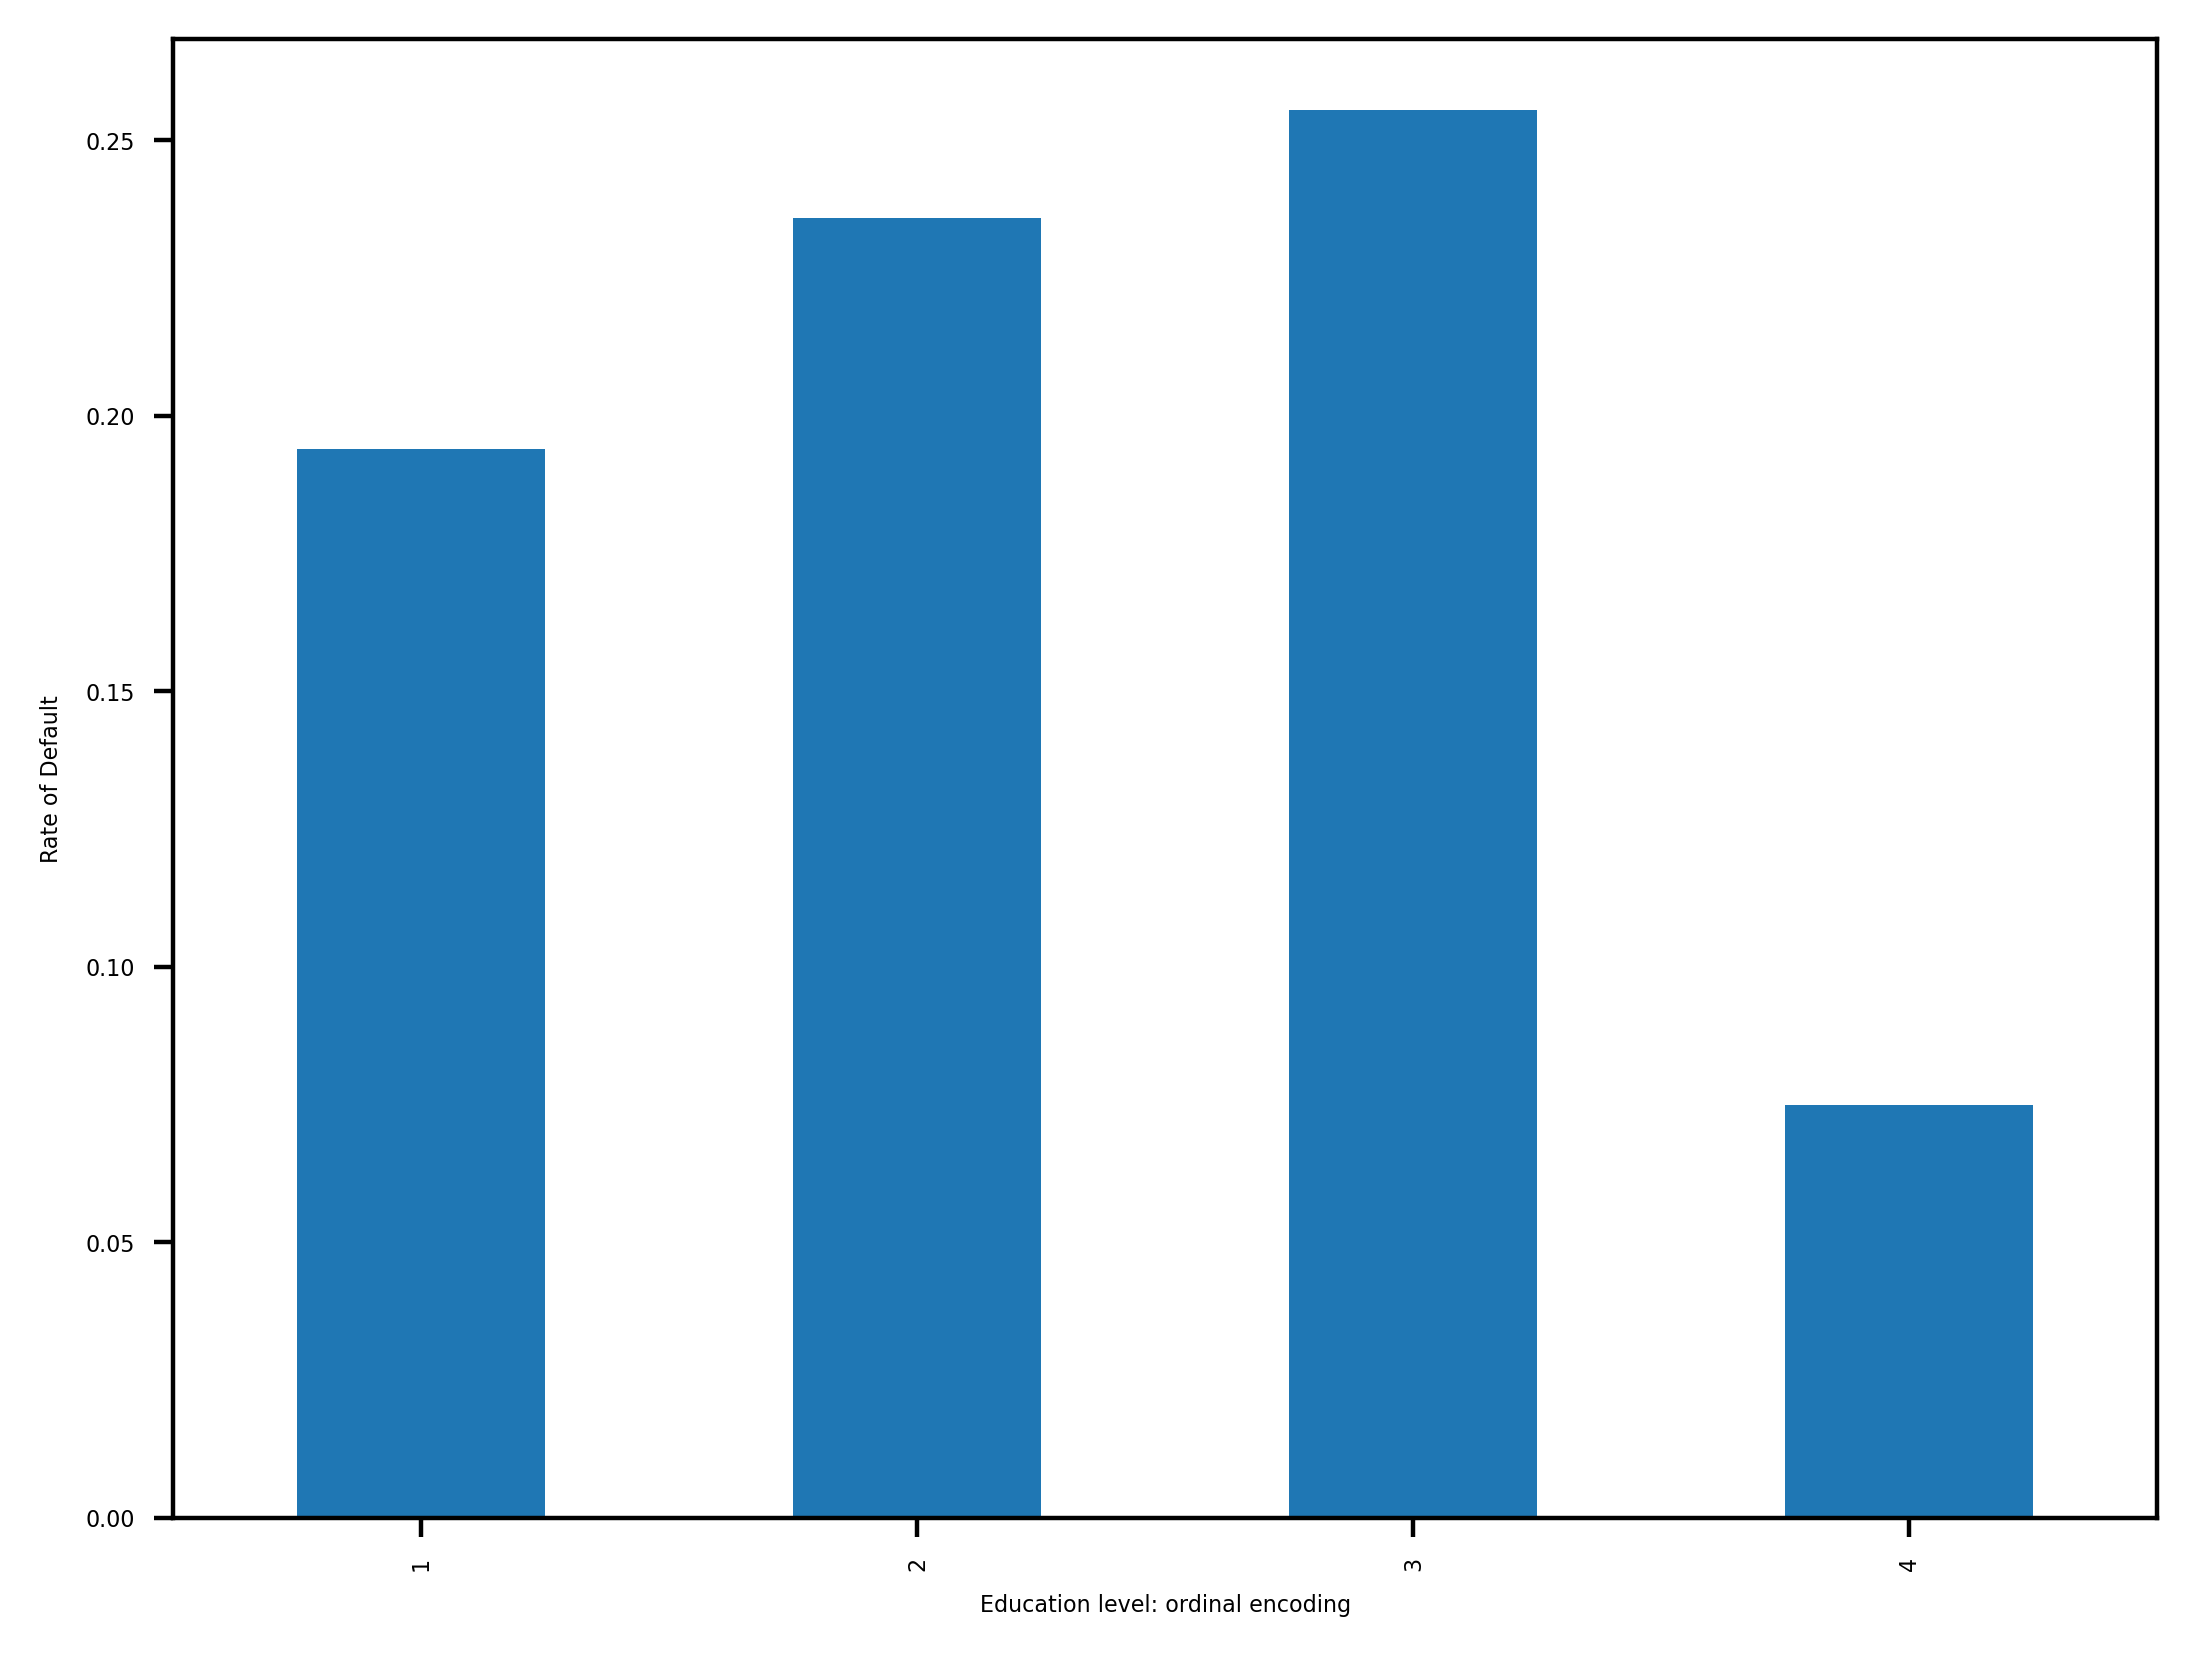

In [131]:
# In this case study, the business problem is classifying whether or not a credit card account will default based on a 6 mont historical period of financial data.
# In such binary classification cases (defined by values 0 & 1), plotting the mean / average of the boolean response variable serves as a 'rate' for the positive class, and therefore can be used to observe if a linear trend exists.
mpl.rcParams['font.size'] = 4
df_clean_2.groupby(by='EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Rate of Default')
plt.xlabel('Education level: ordinal encoding')

In [132]:
# From above bar chart, there is not linear relation between education level in an ordinal encoding sequence versus rate of default. In such a case, it can be established that there is no linear relation between all input features and the response variable.
# It is best to use a more complex, non-linear model such as Random Forest.
# If a linear model classification model such as logistic regression is still desired for ease of interoperability, then employ one hot encoding instead to avoid implicit linear relations inherited by sequential orderings.

### One Hot Encoding - EDUCATION_CAT

In [133]:
# pandas get dummies to transform education categories to boolean cols
ohe_edu = pd.get_dummies(df_clean_2['EDUCATION_CAT'])

In [134]:
# concatenate one hot education to df_clean_2
df_with_ohe = pd.concat([df_clean_2, ohe_edu], axis=1)
df_with_ohe.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


### Data Quality Checks & Exploration - Financial Features [PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6]

In [135]:
pay_features = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [136]:
# Describe data to view aggregate statistics
df_with_ohe[pay_features].describe()
# Of note, the data dictionary defines a value of 9 as the maximum value for Pay features. The maximum observed value from all accounts after cleaning is 8. 

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [137]:
# Exploring distribution of financial features
pay_features_distribution = pd.concat([df_with_ohe[pay_features[0]].value_counts().sort_index(), df_with_ohe[pay_features[1]].value_counts(), df_with_ohe[pay_features[2]].value_counts(), df_with_ohe[pay_features[3]].value_counts(), df_with_ohe[pay_features[4]].value_counts(), df_with_ohe[pay_features[5]].value_counts()], axis=1)
pay_features_distribution

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2476,3375,3654,3893,4056.0,4366.0
-1,5047,5368,5290,5070,4949.0,5138.0
0,13087,13961,13968,14596,15032.0,14416.0
1,3261,24,3,2,NaN,NaN
2,2378,3509,3400,2798,2335.0,2476.0
3,292,289,214,161,151.0,156.0
4,63,85,69,57,71.0,43.0
5,23,24,20,30,14.0,10.0
6,11,11,19,4,2.0,15.0
7,9,17,24,51,53.0,42.0


Text(0.5, 1.0, 'Distribution of PAY_1')

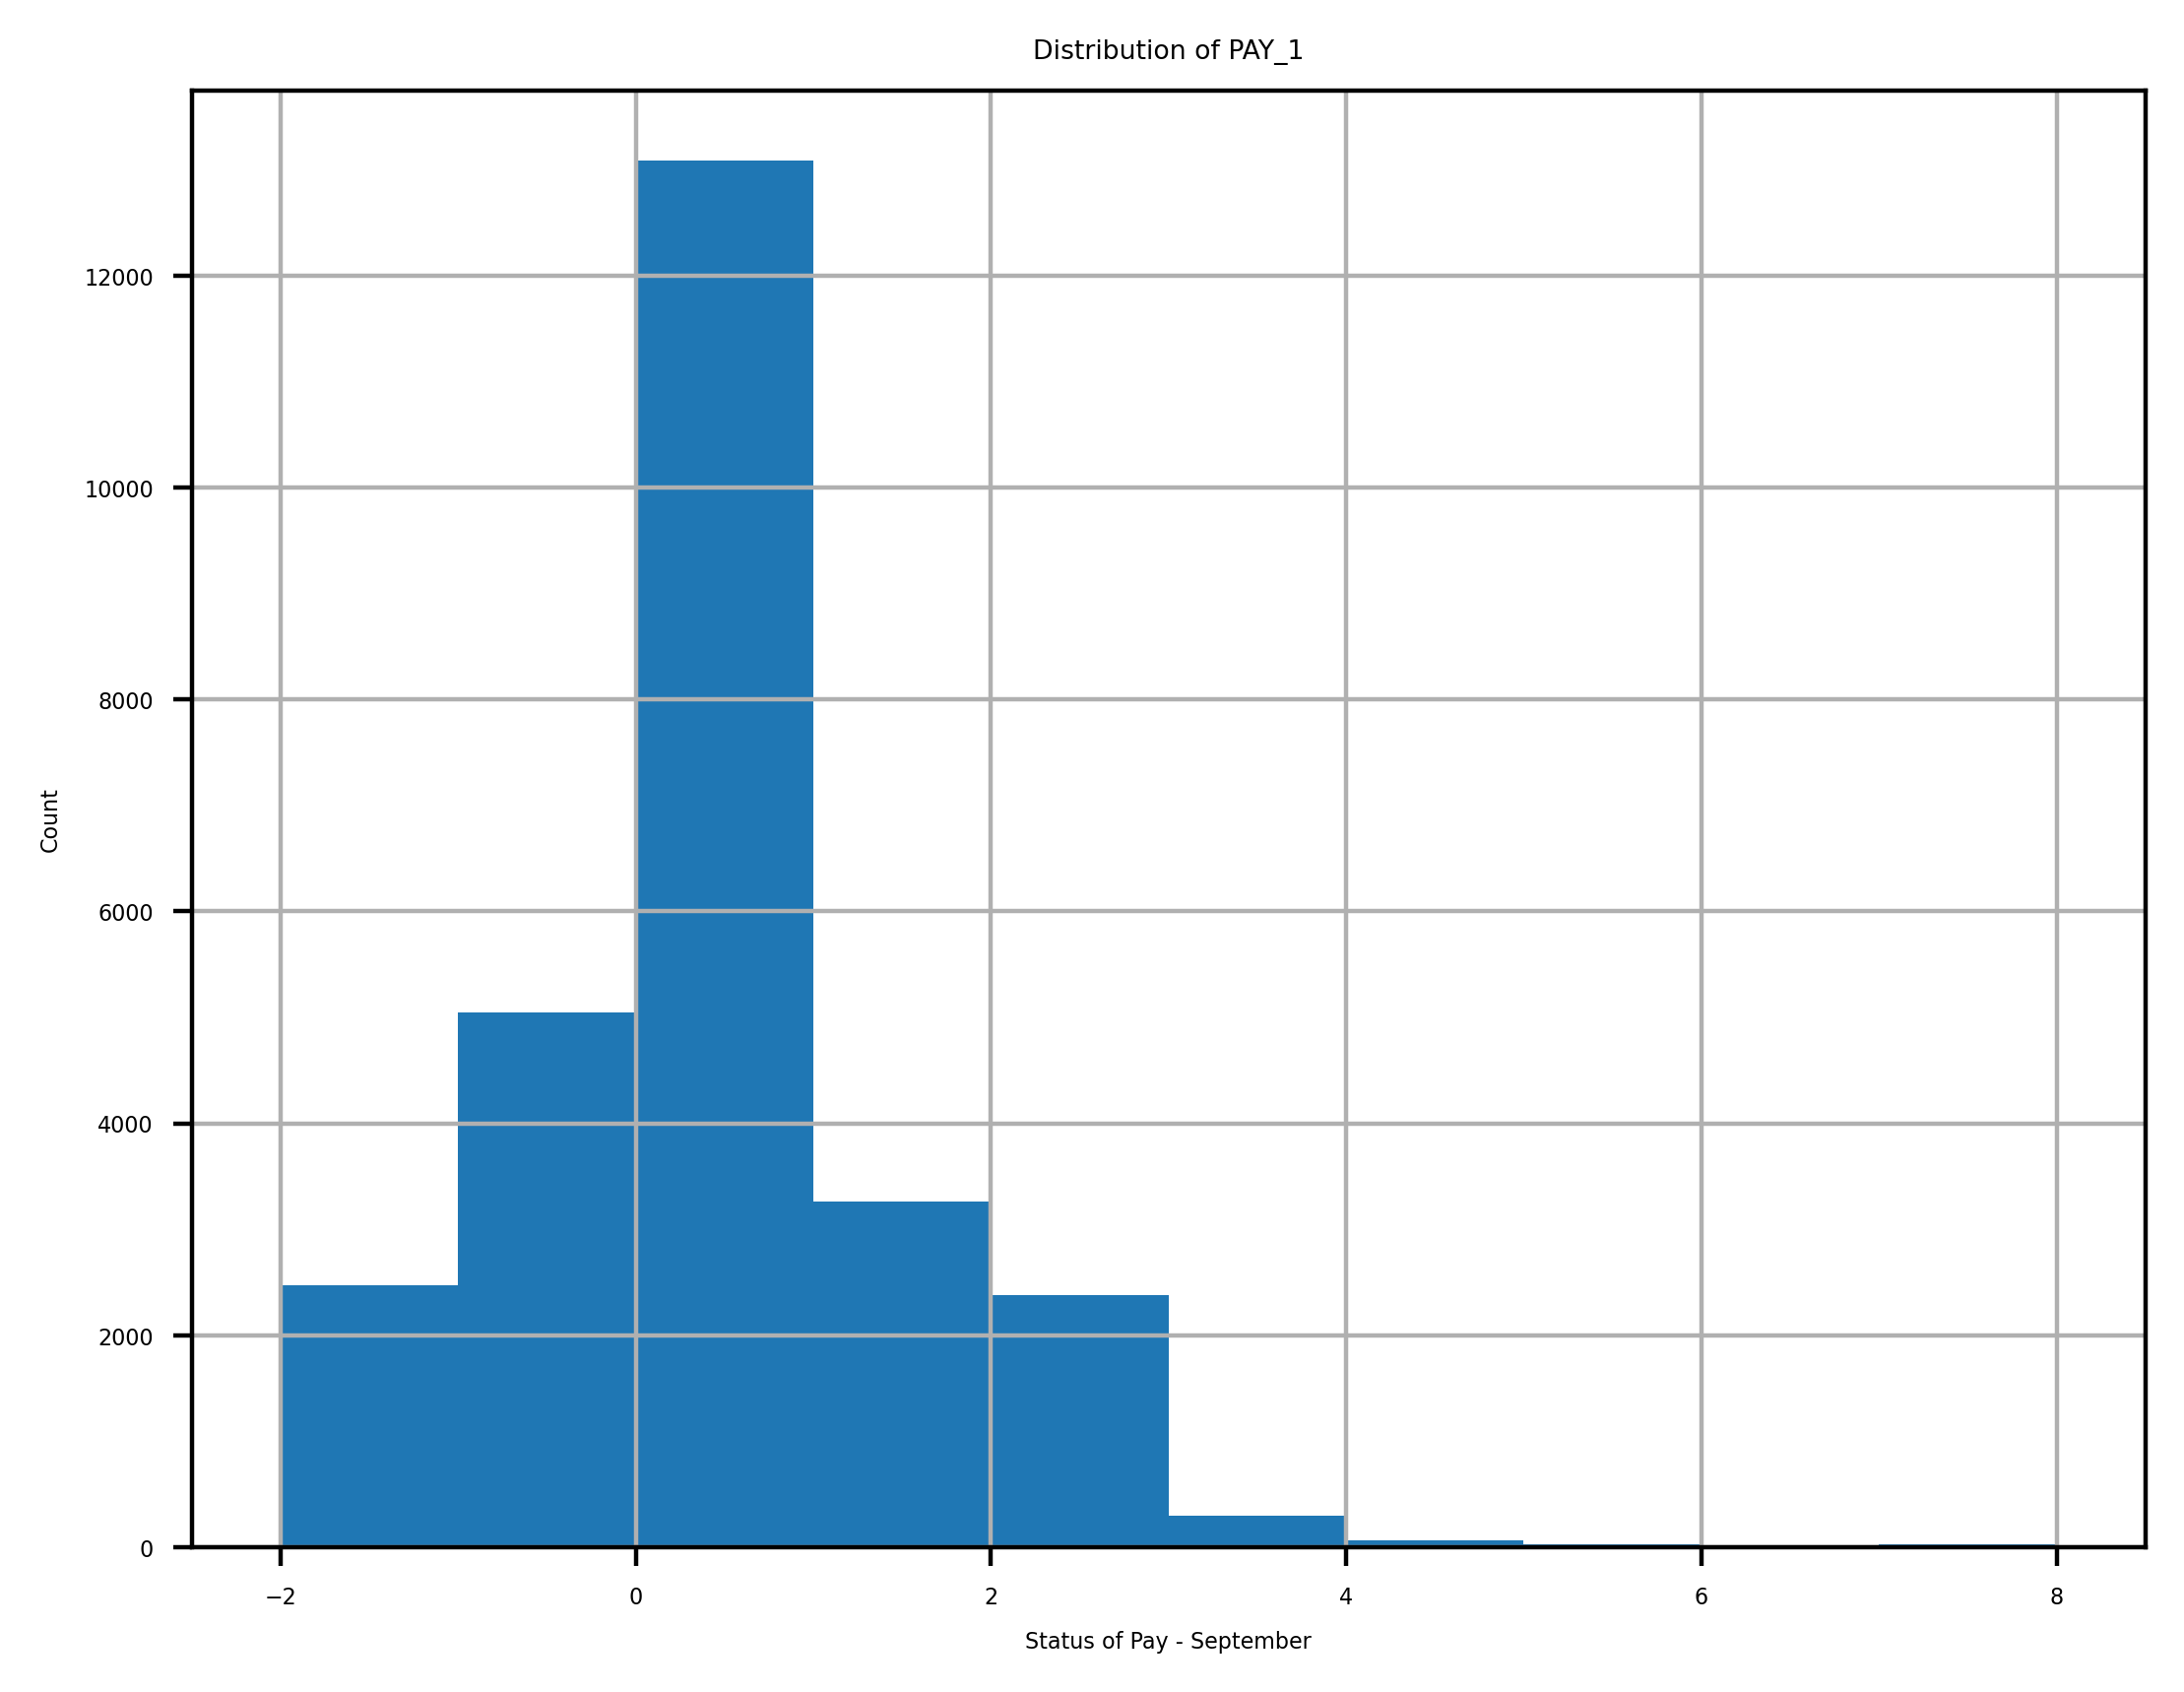

In [138]:
# Graphical representation of above distribution
# Starting off with exploration of PAY_1. 
# How to create an accurate graphical representation of PAY_1?
mpl.rcParams['font.size'] = 4
df_with_ohe[pay_features[0]].hist()
plt.xlabel('Status of Pay - September')
plt.ylabel('Count')
plt.title('Distribution of PAY_1')
# The below figure serves as a histogram of PAY_1. However, the location of the bin edges for the histogram are not ideal. With the limited unique values in PAY_1, it makes sense to center the distribution bars, hence define bin ranges.

In [139]:
# Bin edges are inclusive of the lower bound range, but exclusive of upper bound, therefore subtract -0.5 from a numpy range to generate a sequence of values with the unique values of PAY features.
pay_bin_edges = np.arange(-2, 10) - 0.5
pay_bin_edges


array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0.5, 1.0, 'Distribution of PAY_1')

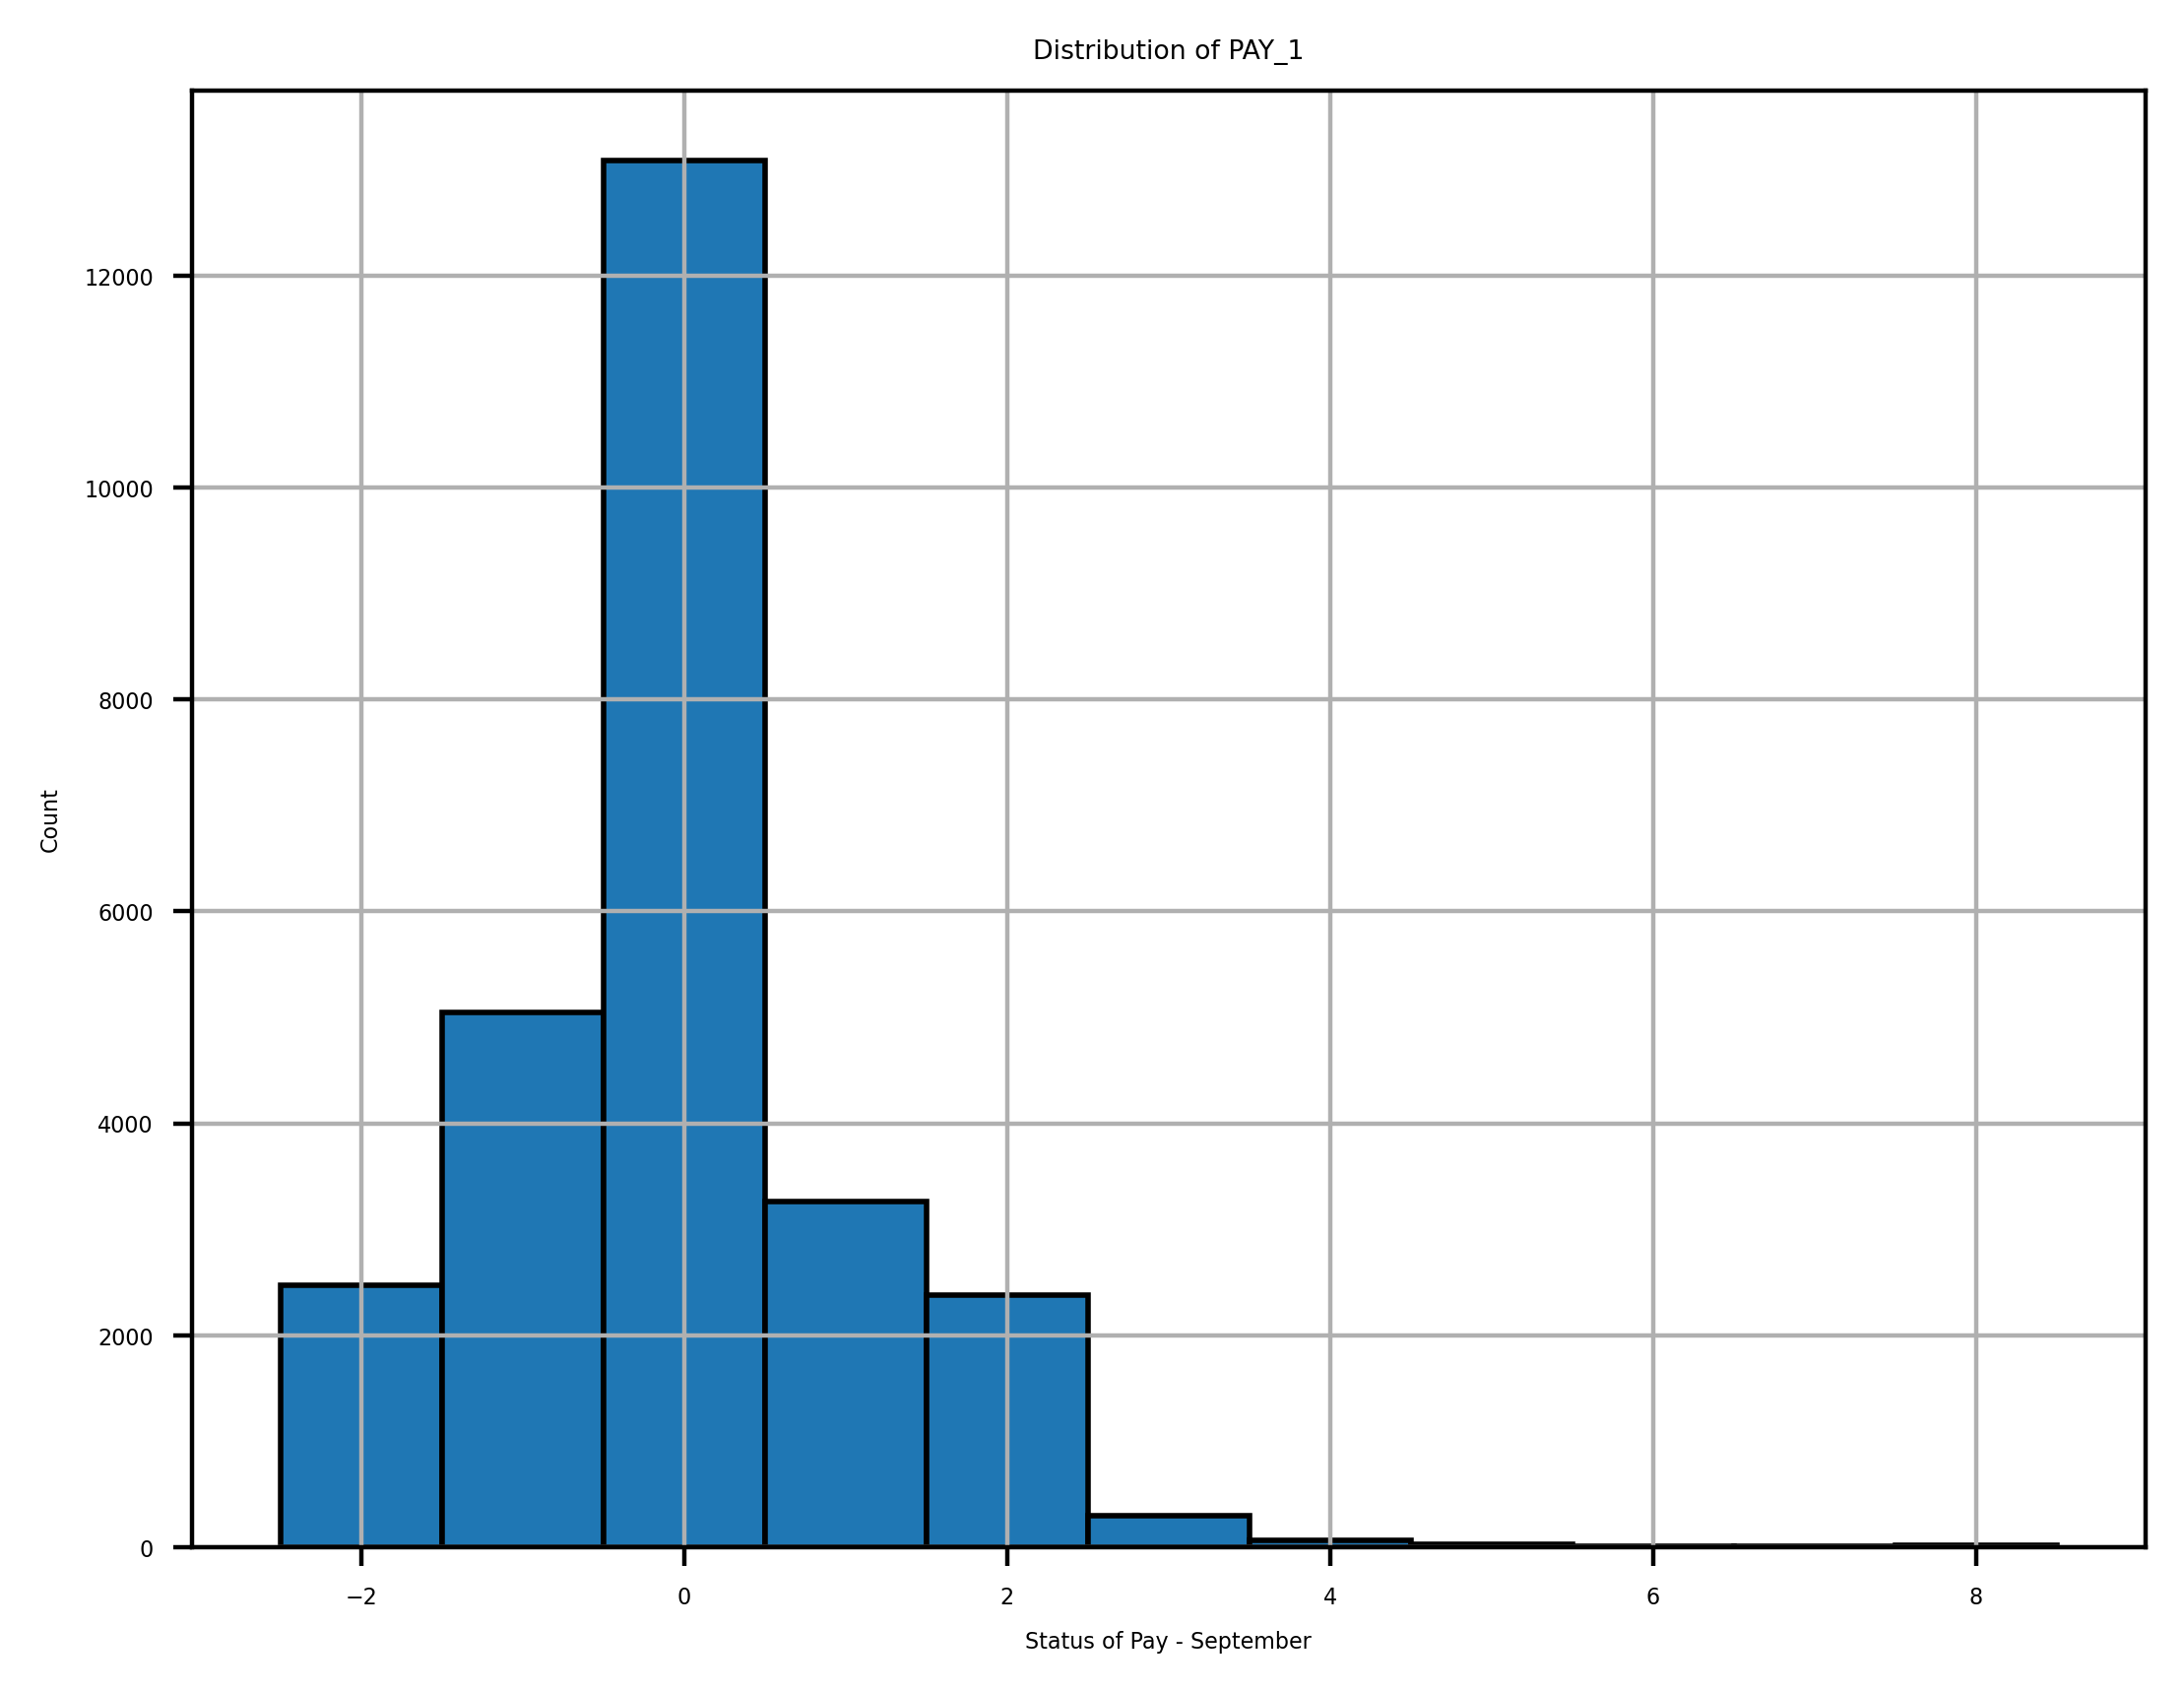

In [140]:
mpl.rcParams['font.size'] = 4
df_with_ohe[pay_features[0]].hist(bins=pay_bin_edges, edgecolor='black')
plt.xlabel('Status of Pay - September')
plt.ylabel('Count')
plt.title('Distribution of PAY_1')
# Observations from below visual
# For current - 1 month (September), a majority of the distribution lies at a value of 0 or lower, meaning most accounts are actually non-delinquent with their payments.
# Logically speaking, this seems correct as most people will try to pay off their card balances.

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

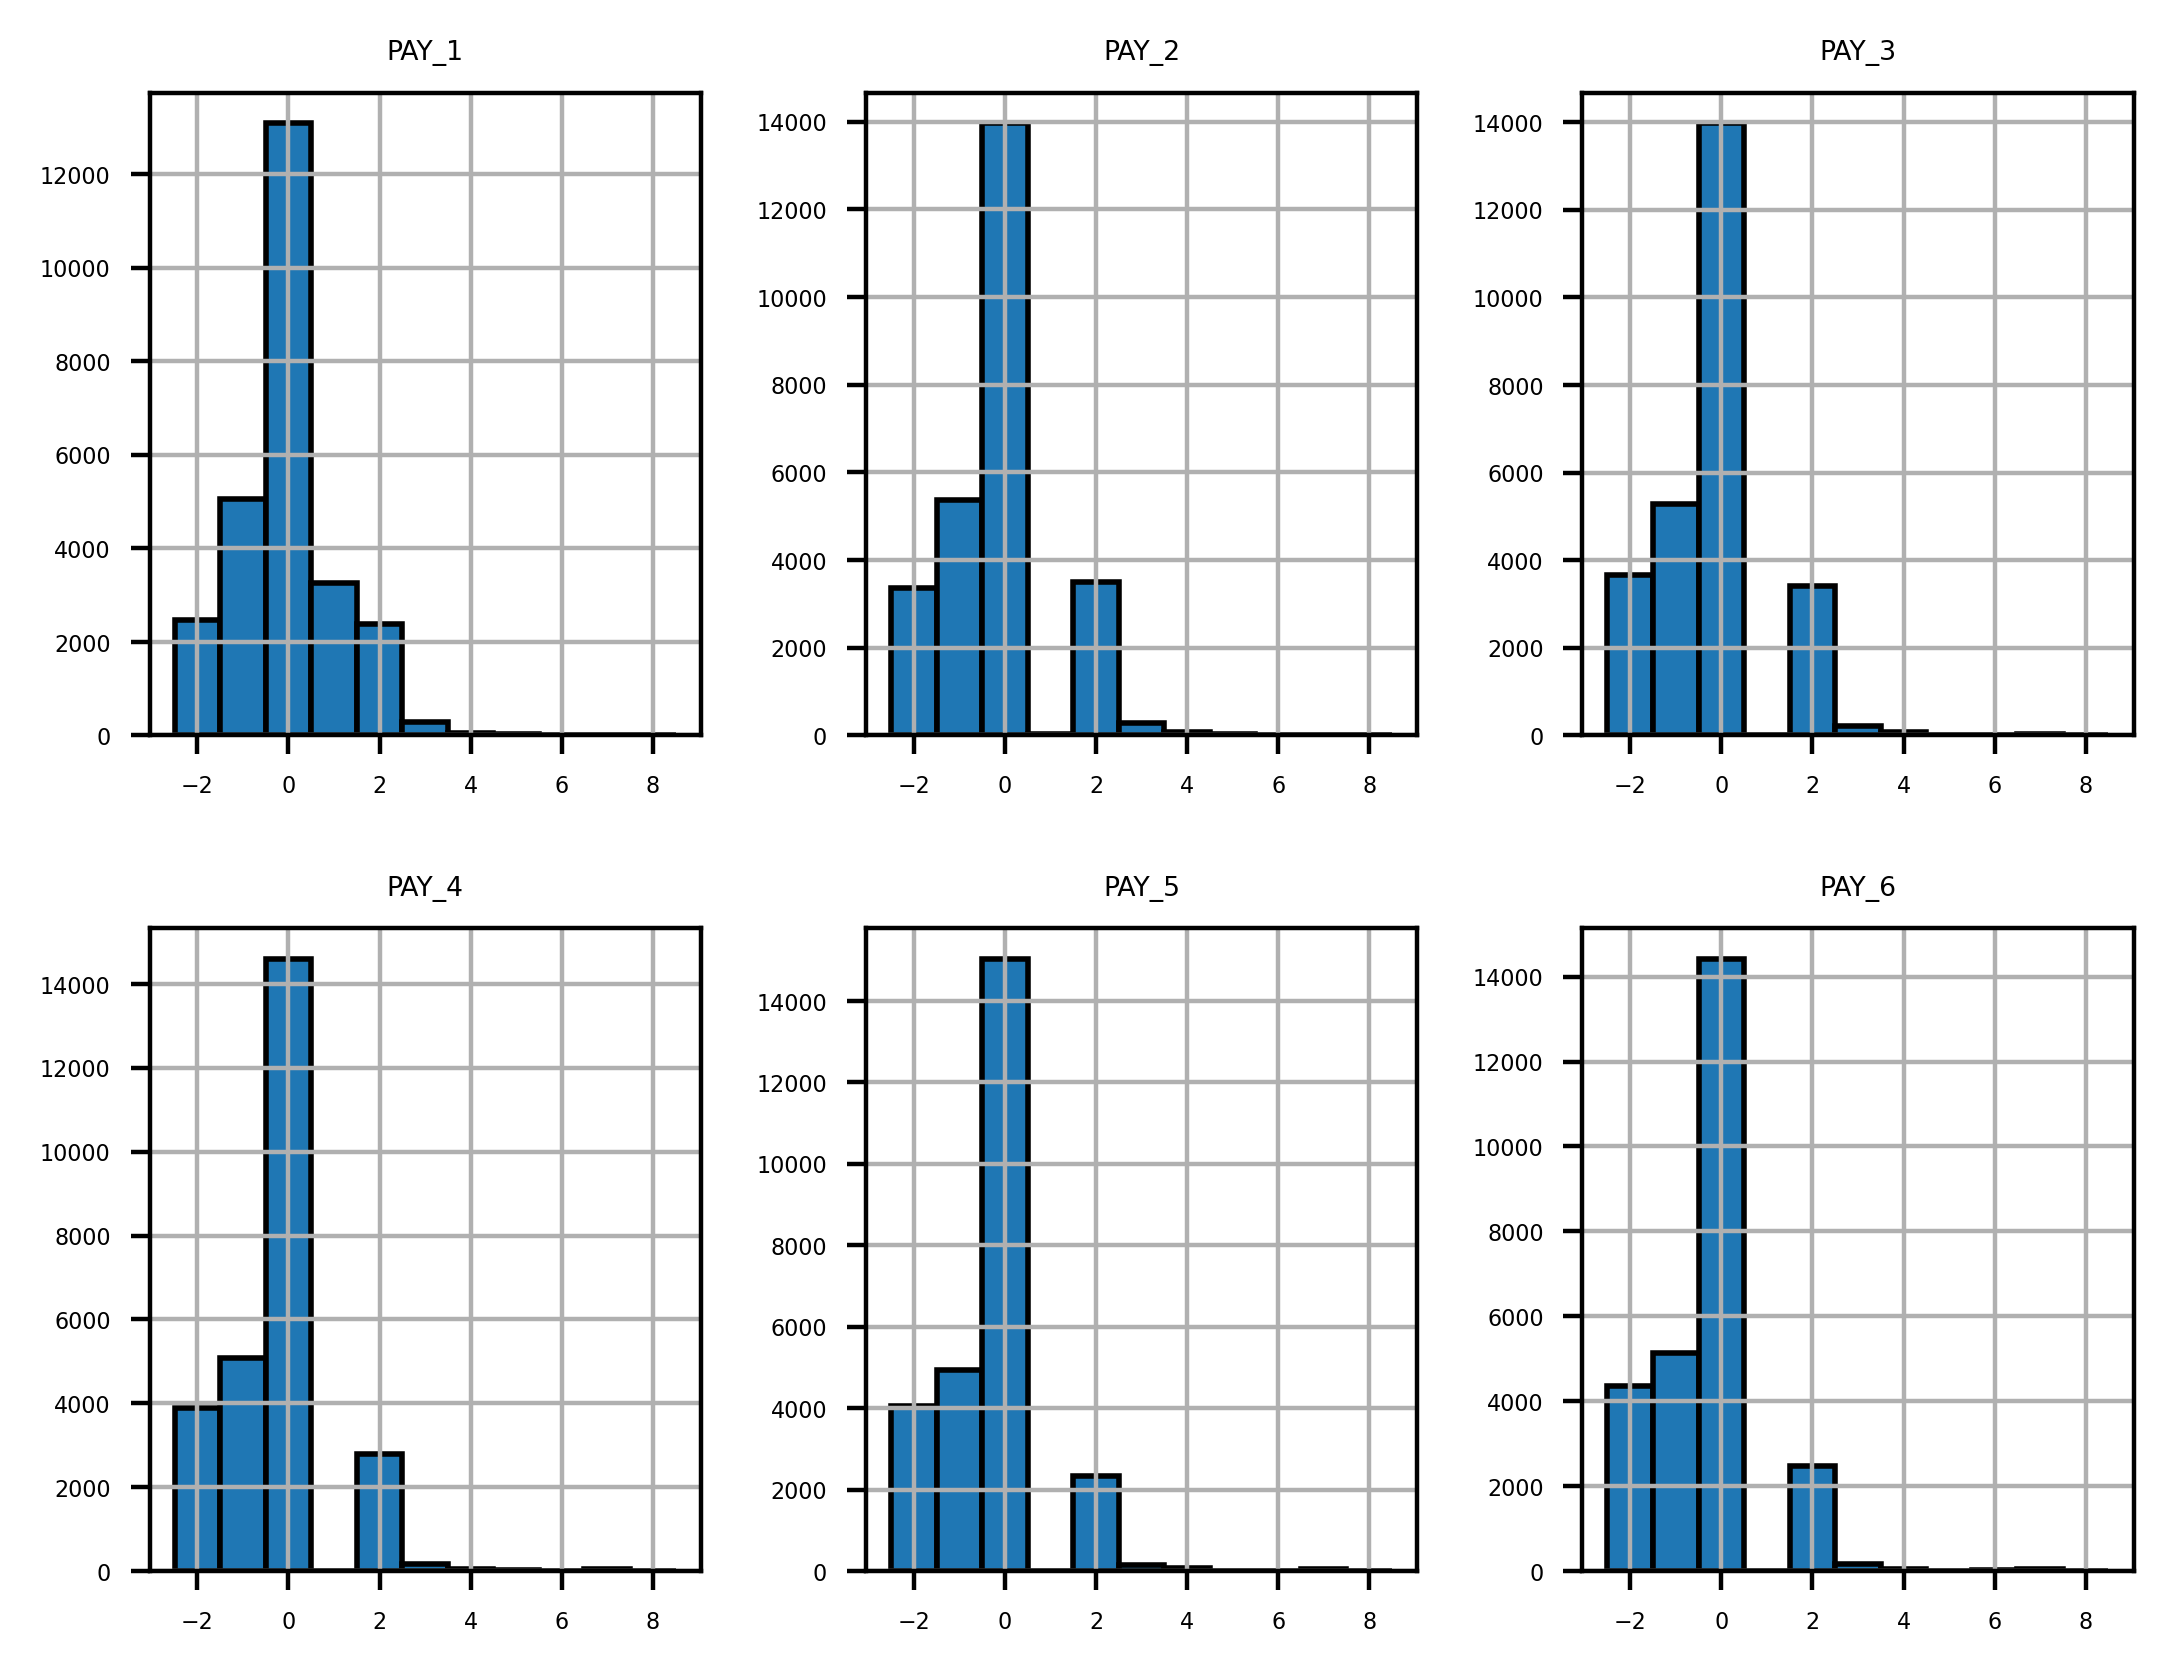

In [141]:
# Applying the same histogram logic to all pay features.
mpl.rcParams['font.size'] = 4
df_with_ohe[pay_features].hist(bins=pay_bin_edges, edgecolor='black', layout=(2, 3))
# From the below visual, there is an obvious data quality issue.
# From PAY_3 (July) data, there are very few, if any, pay statuses = 1, meaning very few credit card accounts are delinquent 1 month in payments. However, in PAY_2 (August), or the next month, there are a few thousand accoutns with payment deliquency of 2 months. There is no way this can be possible, as accounts must be delinquent 1 month before 2 months.

In [142]:
df_clean_2.loc[df_clean_2['PAY_2'] == 2, :][['PAY_2', 'PAY_3']]
# When PAY_2 (August) has a code of 2 for delinquency of 2 months, these corresponding accounts should have a code of 1 in PAY_3 (July). However, a large portion of these accounts in July do not have a delinquency of 1 month.

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2
...,...,...
29974,2,2
29976,2,3
29981,2,2
29991,2,2


In [143]:
# According to Klosterman's book, this data quality issue is a result of the client failing to pull the correct data for all months prior to the most recent month. Because of this, only the most recent month (PAY_1 / September) contains fully correct data. 

# In industry, there a few approaches to data gaps such as the one seen above if the data quality issue arises from a client. One way is to reach out to the client and request a correction to their data product extracts. Another way is to backfill or forward fill data if the data is a static field that is not expected to change on a month to month basis.

# In this case, PAY_1 is the only financial feature that can be used for predictive modeling, as the other features contain inaccurate information. 

### Data Quality Checks & Exploration - Financial Features 

 - [BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6]
 - [PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]

In [144]:
# Exploring the other financial features in the dataset starting off with BILL_AMT 
bill_amt_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [145]:
df_clean_2[bill_amt_features].describe()
# Maximum bill amounts are in the hundred thousands.
# Some accounts have a negative bill amount. What could this mean?

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

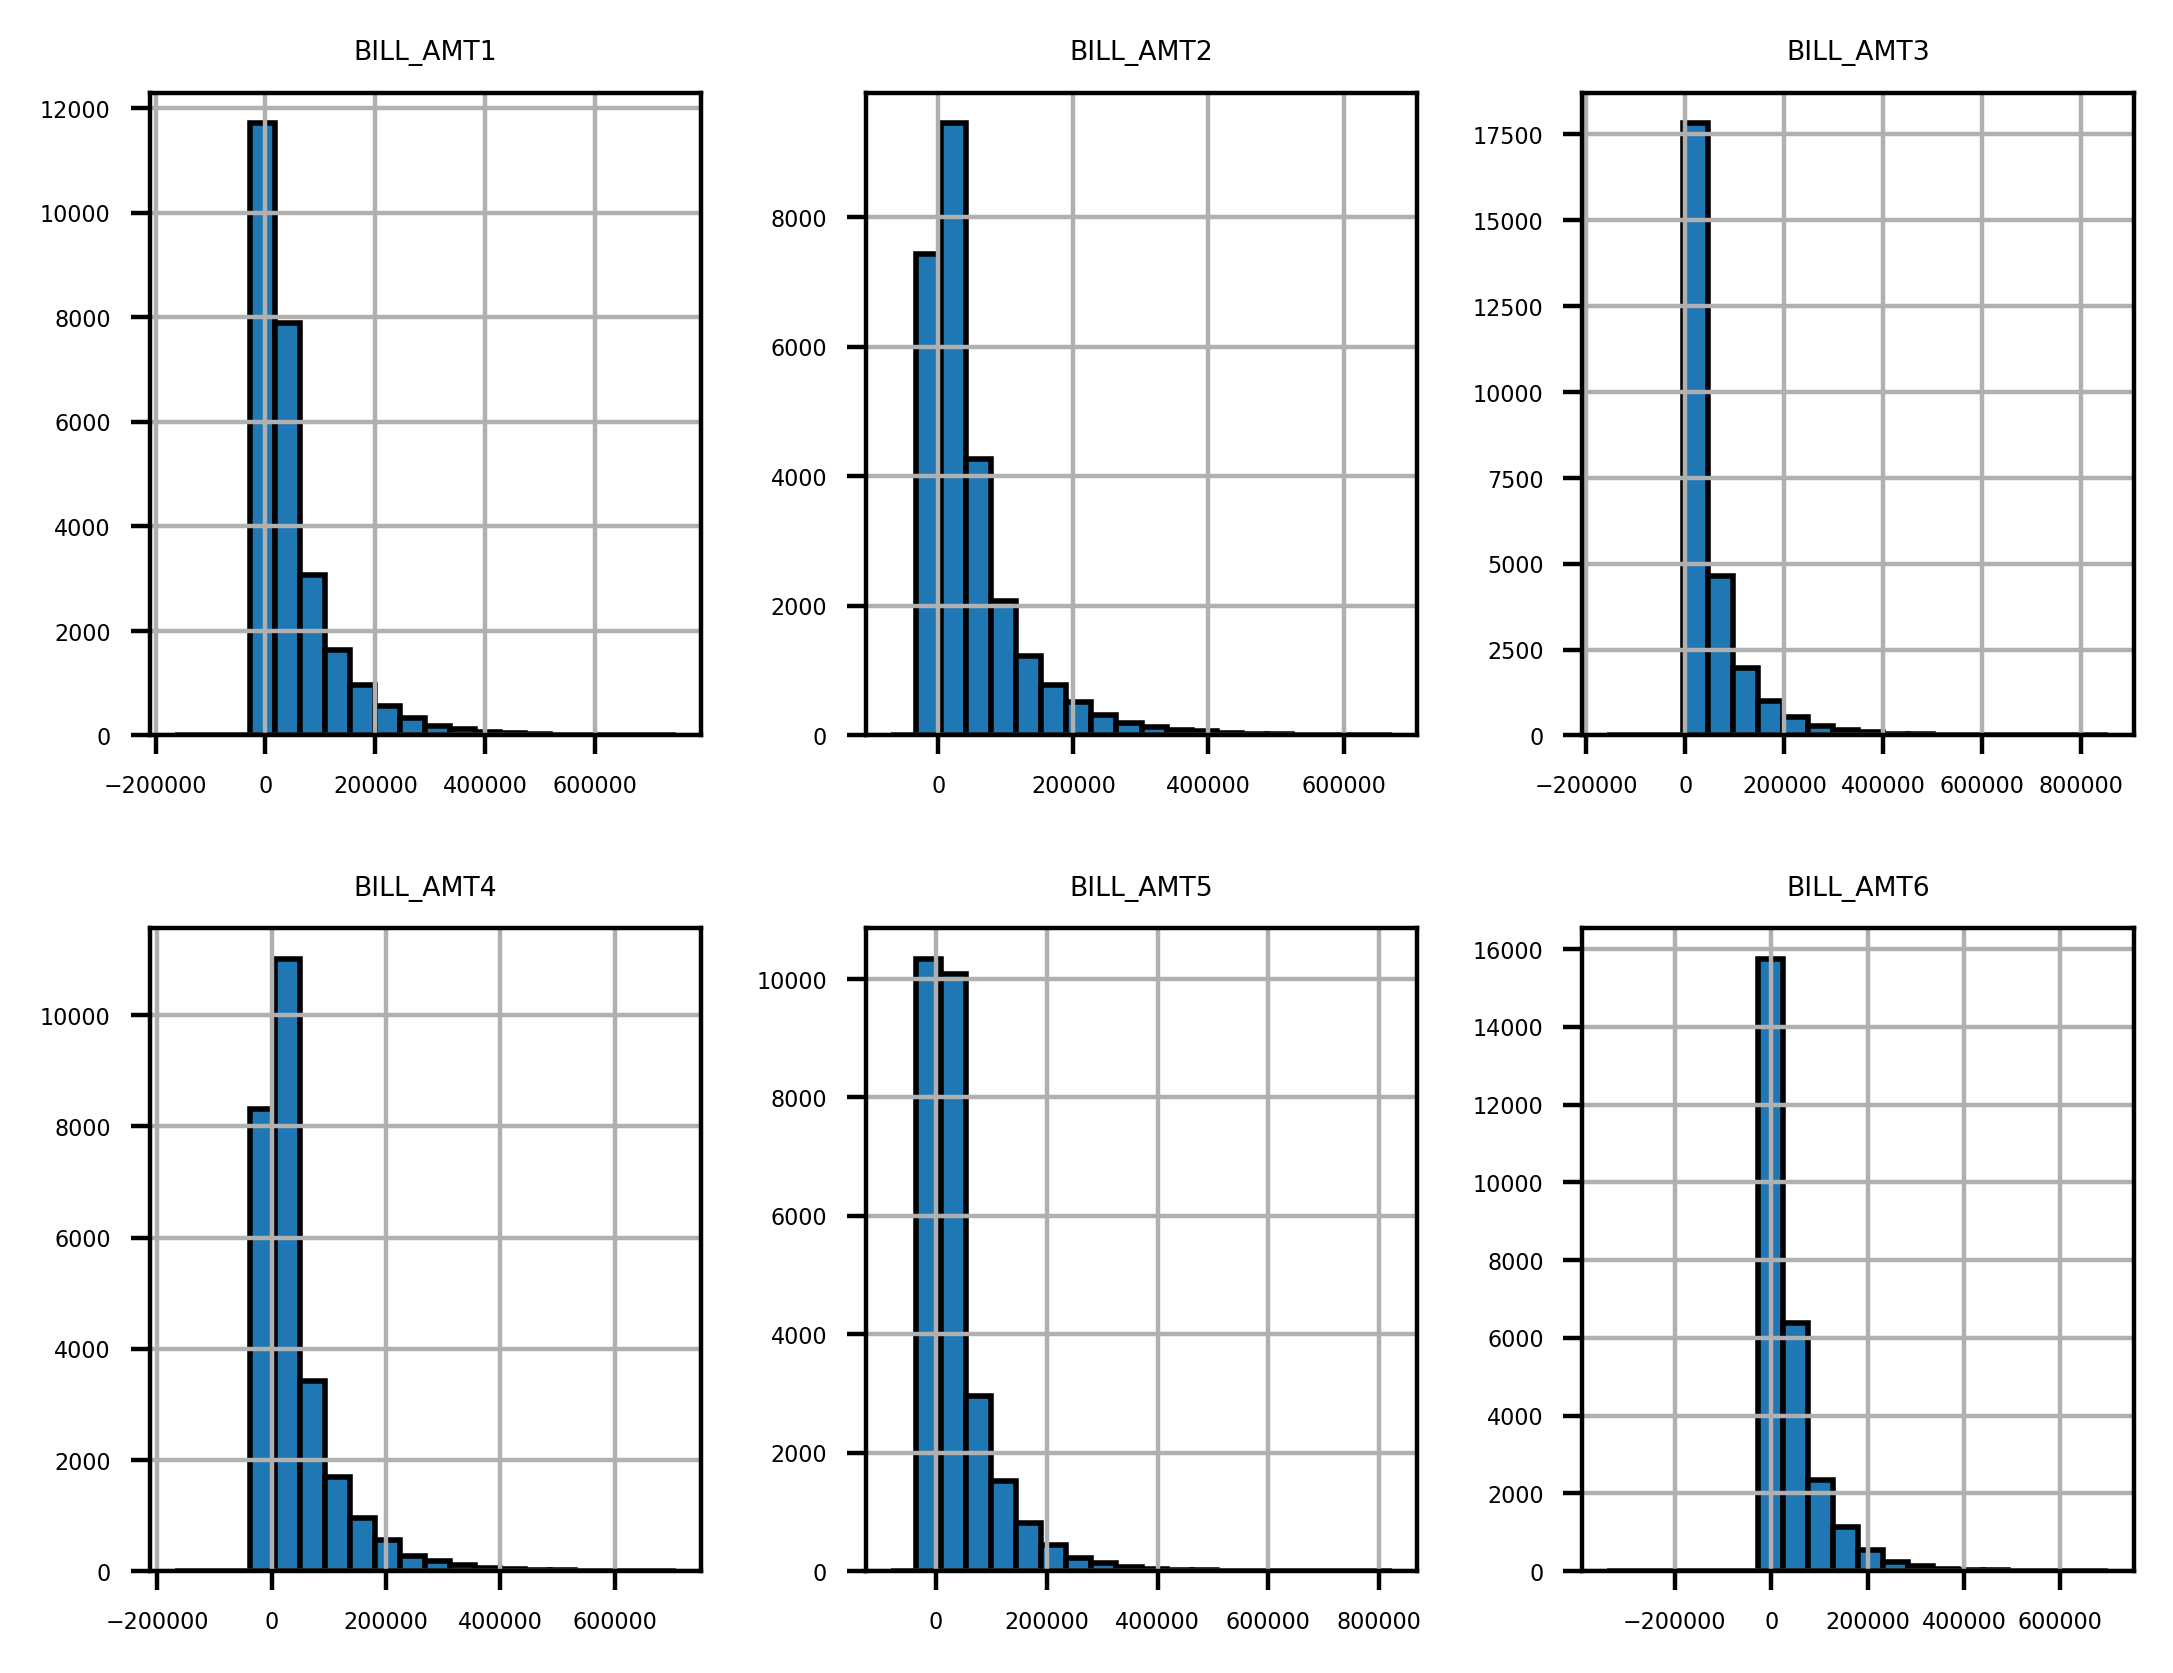

In [146]:
df_clean_2[bill_amt_features].hist(bins=20, edgecolor='black', layout=(2,3))
    # From below, the minimum bill amounts for each bill amount cycle is close to 0 counts.

In [147]:
df_clean_2[pay_amt_features].describe()
# Payment amount magnitudes are in scale of bill amounts
# Again, maximum values in the hundreds of thousands. 
# Minimum payment amouint of 0 makes sense

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

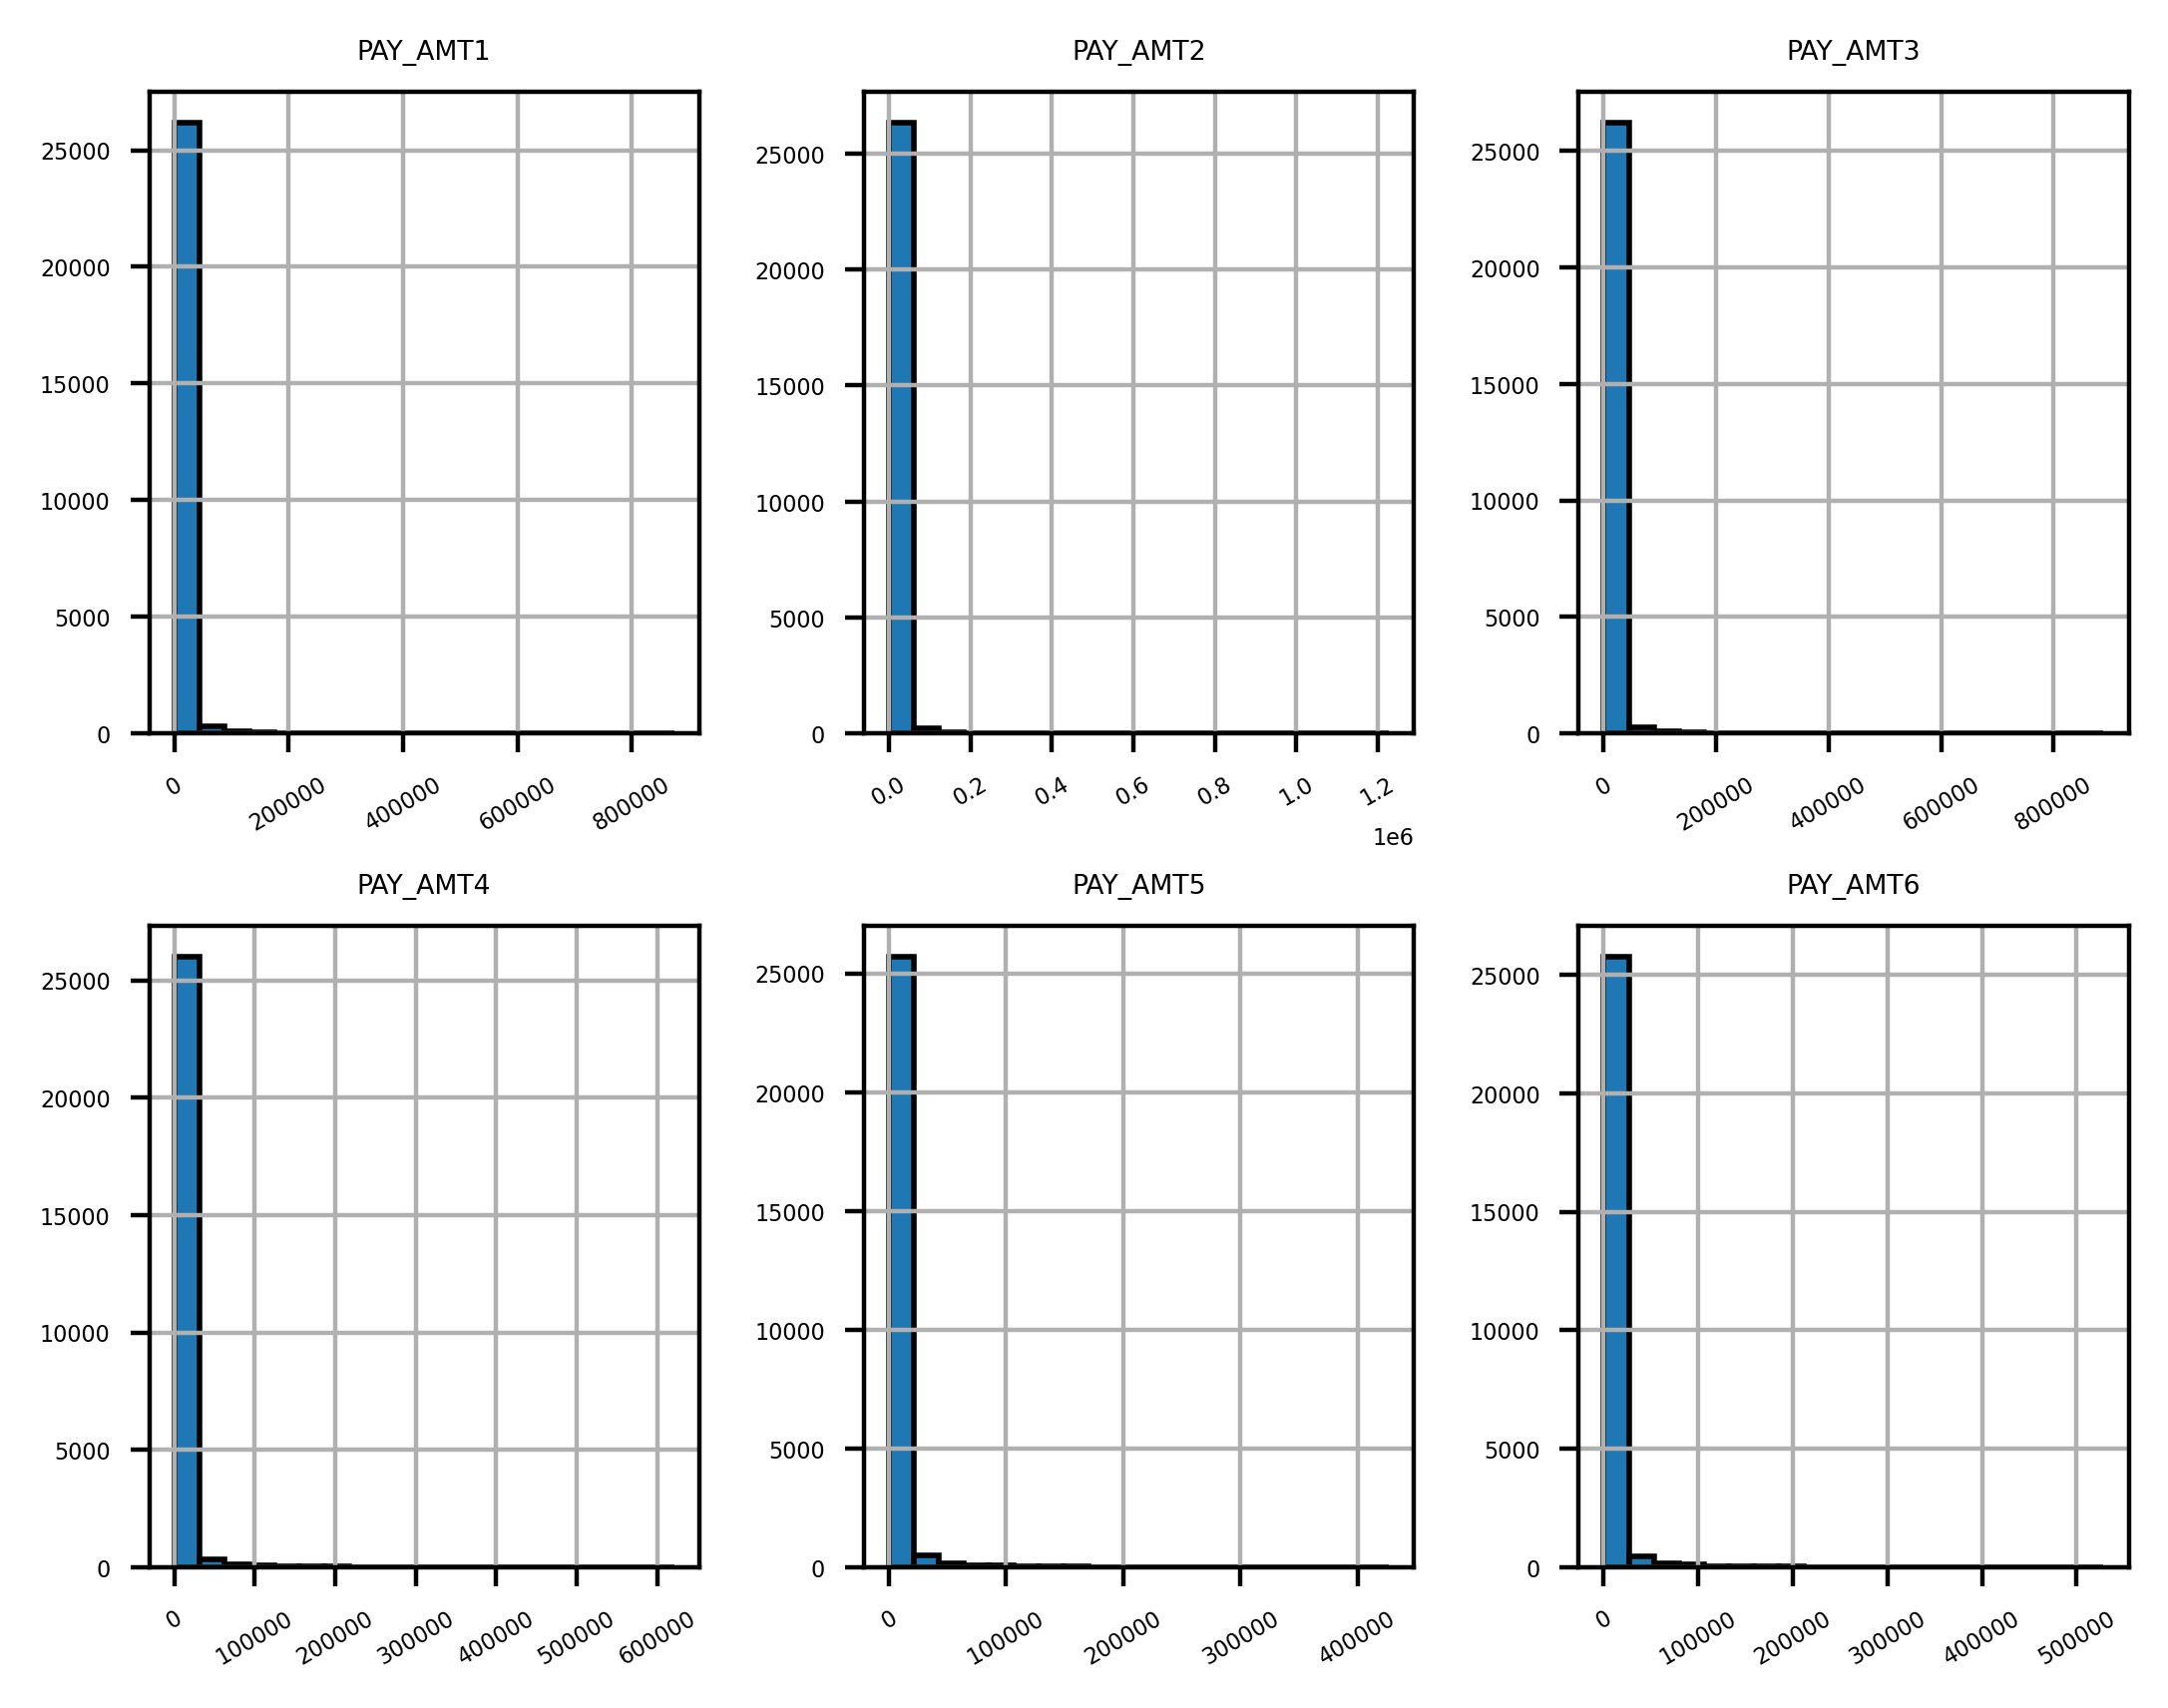

In [148]:
df_clean_2[pay_amt_features].hist(bins=20, edgecolor='black', layout=(2,3), xrot=30)
# From below plots, a majority of payments are on the lower end of amounts, with many potentially at 0.
# Scale of the x-axis may be a bit large with massive outliers in data

In [149]:
pay_amount_zeroes_mask = df_clean_2[pay_amt_features] == 0
total_zeros = sum(df_clean_2[pay_amt_features].iloc[:, :].any(axis=1))

print('The total occurrences of a 0 payment in a 6 month period is: ', total_zeros)

The total occurrences of a 0 payment in a 6 month period is:  25386


In [150]:
pay_amount_zeroes_mask.sum()
# For each pay cycle, count of zero dollar payments 
# Older, historical data contains more zero dollar payments. 
# This is accurately represented in the above graphs

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

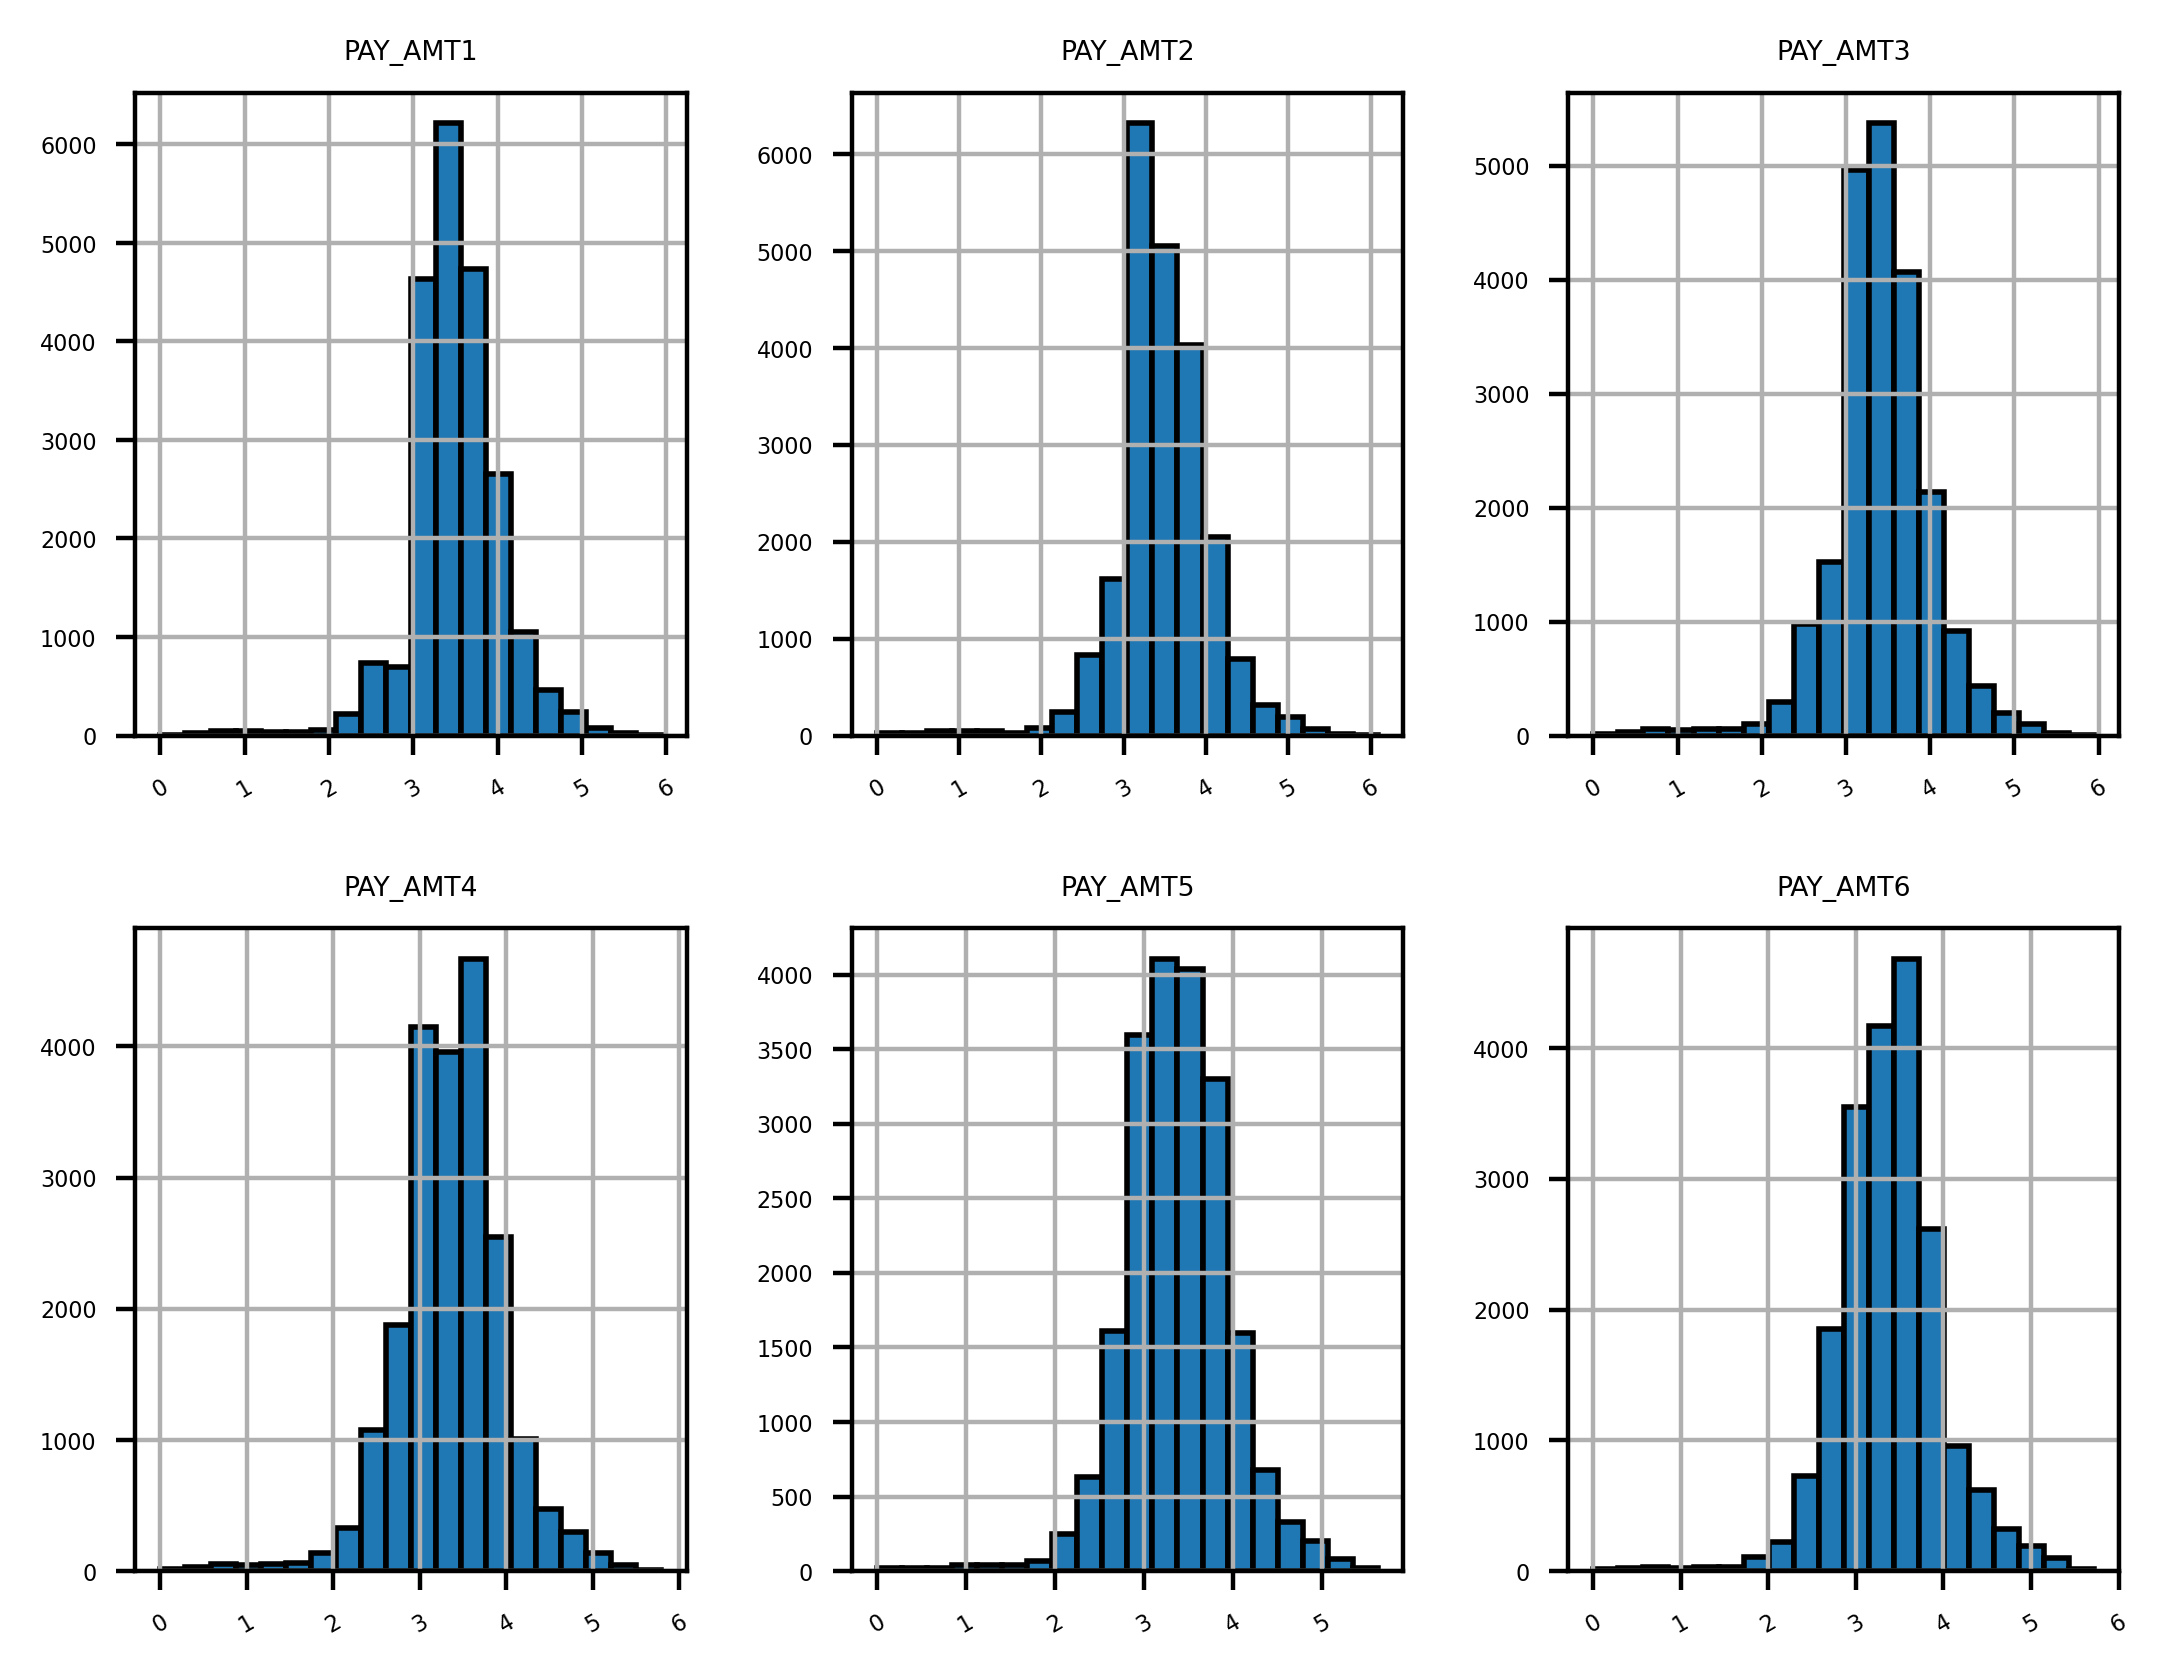

In [151]:
# Ignoring the 0 dollar payments and applying numpy logarithmic transformation to the data for plotting
# Cannot have a negative log value, therefore filter out zeros
# Log 10 transformation applied helps visualize payment distributions in a less skewed visual
df_clean_2[pay_amt_features][~pay_amount_zeroes_mask].apply(np.log10).hist(bins=20, edgecolor='black', layout=(2,3), xrot=30)

In [152]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT'],
      dtype='object')

### Data Quality Checks & Exploration - Response Variable - 'default payment next month'

In [153]:
df_clean_2['default payment next month'].value_counts()
# Two unique values for defaults
# An account may either default in the coming month, or it will not default in the coming month 
# In such a case, this is a binary classification problem

0    20750
1     5914
Name: default payment next month, dtype: int64

In [154]:
df_clean_2['default payment next month'].mean()
# Because the data is a binary classification problem, a mean of the 0, 1 encoded response variable column will provide a 'class fraction', or a positive rate. In this case, this value represents 22% of accounts default after a 6 month historical period.

0.2217971797179718

In [155]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT'],
      dtype='object')

In [157]:
df_clean_2.to_excel('../Data/df_clean_2.xlsx', index=False)